# Importing Data

,TIME,CH1
0,-32.00000,-16.0
1,-31.99997,-16.2
2,-31.99994,-16.3
3,-31.99990,-16.5
4,-31.99987,-16.7
...,...,...
1999995,31.99984,-15.6
1999996,31.99987,-15.7
1999997,31.99990,-15.6
1999998,31.99994,-15.6


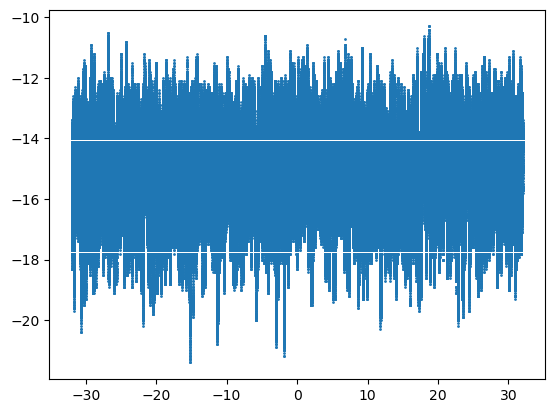

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np

data = pd.read_csv('Data/Trapped Particle 01 - 2M pts.CSV', skiprows=15)
display(data)

plt.plot(data['TIME'], data['CH1'], 'o', markersize=1)
plt.show()

# Calculating FFT and PSD

In [10]:
voltages = data['CH1'] # Extract the signal
voltages = voltages - voltages.mean() # De-mean the signal

dt = data['TIME'].iloc[1] - data['TIME'].iloc[0] # Get the time step between points
total_timesteps = len(voltages) # Get the total number of time steps

# Compute PSD using scipy.signal.welch for better performance
welch = signal.welch(voltages, fs=1/dt, nperseg=2**15, scaling='density')
freqs = welch[0]
psd = welch[1]

psds = pd.DataFrame({'Frequency': freqs, 'PSD': psd})
display(psds)

,Frequency,PSD
0,0.000000,3.015870e-02
1,1.017253,1.446469e-01
2,2.034505,1.297805e-01
3,3.051758,1.249655e-01
4,4.069010,1.159173e-01
...,...,...
16380,16662.597657,1.048527e-07
16381,16663.614909,1.375570e-07
16382,16664.632162,1.188030e-07
16383,16665.649415,1.156731e-07


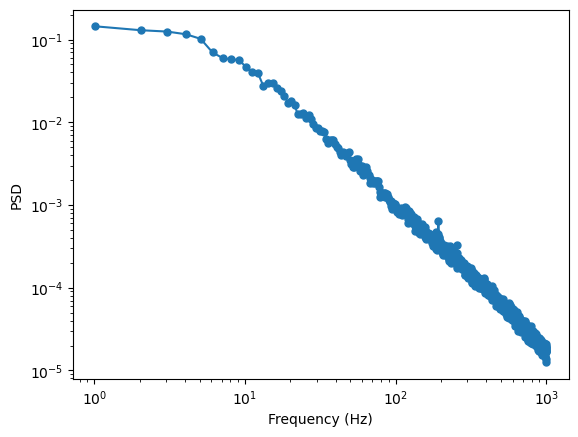

In [11]:
# We only graph low frequencies, since higher ones are noise
mask = psds['Frequency'] > 0 # Ignore the zero frequency
mask &= psds['Frequency'] < 1000
# plt.plot(psds['Frequency'][mask], psds['PSD'][mask])
# We use a scatter plot with a connecting line
plt.plot(psds['Frequency'][mask], psds['PSD'][mask] , 'o-', markersize=5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.xscale('log')
plt.yscale('log')

In [12]:
import math
boltzmann = 1.38 * 10**(-23)
beta_val = 6 * math.pi * 23 * 10**(-6) * 1.0016 * 10**(-3)
temp = 300
rho_vals = np.sqrt(psd * freqs**2 * math.pi**2 * beta_val/(boltzmann * temp))

In [13]:
rho_avg = np.mean(rho_vals)
print(rho_avg)

137895646.98368067
